## Imports

In [159]:
# for managing dataframes
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

import datetime

## Importing data

In [108]:
data_file = "data/OxCGRT_latest.csv"
dta = pd.read_csv(data_file, parse_dates=["Date"])

In [102]:
dta.describe(include="all").transpose()

count unique                  top freq  \
CountryName                            28793    176             Thailand  165   
CountryCode                            28793    176                  PRT  165   
Date                                   28793    165  2020-04-09 00:00:00  176   
C1_School closing                      27937    NaN                  NaN  NaN   
C1_Flag                                14559    NaN                  NaN  NaN   
C2_Workplace closing                   27891    NaN                  NaN  NaN   
C2_Flag                                13040    NaN                  NaN  NaN   
C3_Cancel public events                27894    NaN                  NaN  NaN   
C3_Flag                                14925    NaN                  NaN  NaN   
C4_Restrictions on gatherings          27900    NaN                  NaN  NaN   
C4_Flag                                13123    NaN                  NaN  NaN   
C5_Close public transport              27893    NaN                  NaN  NaN   
C5_Flag                                 9552    NaN                  NaN  NaN   
C6_Stay at home requirements           27921    NaN                  NaN  NaN   
C6_Flag                                11801    NaN                  NaN  NaN   
C7_Restrictions on internal movement   27916    NaN                  NaN  NaN   
C7_Flag                                12001    NaN                  NaN  NaN   
C8_International travel controls       27757    NaN                  NaN  NaN   
E1_Income support                      27776    NaN                  NaN  NaN   
E1_Flag                                 8192    NaN                  NaN  NaN   
E2_Debt/contract relief                27927    NaN                  NaN  NaN   
E3_Fiscal measures                     27535    NaN                  NaN  NaN   
E4_International support               27863    NaN                  NaN  NaN   
H1_Public information campaigns        27764    NaN                  NaN  NaN   
H1_Flag                                19680    NaN                  NaN  NaN   
H2_Testing policy                      27855    NaN                  NaN  NaN   
H3_Contact tracing                     27911    NaN                  NaN  NaN   
H4_Emergency investment in healthcare  27518    NaN                  NaN  NaN   
H5_Investment in vaccines              27847    NaN                  NaN  NaN   
M1_Wildcard                                0    NaN                  NaN  NaN   
ConfirmedCases                         19909    NaN                  NaN  NaN   
ConfirmedDeaths                        19909    NaN                  NaN  NaN   
StringencyIndex                        27734    NaN                  NaN  NaN   
StringencyIndexForDisplay              28382    NaN                  NaN  NaN   
StringencyLegacyIndex                  27734    NaN                  NaN  NaN   
StringencyLegacyIndexForDisplay        28382    NaN                  NaN  NaN   
GovernmentResponseIndex                27718    NaN                  NaN  NaN   
GovernmentResponseIndexForDisplay      28373    NaN                  NaN  NaN   
ContainmentHealthIndex                 27721    NaN                  NaN  NaN   
ContainmentHealthIndexForDisplay       28375    NaN                  NaN  NaN   
EconomicSupportIndex                   27722    NaN                  NaN  NaN   
EconomicSupportIndexForDisplay         28360    NaN                  NaN  NaN   

                                                     first  \
CountryName                                            NaN   
CountryCode                                            NaN   
Date                                   2020-01-01 00:00:00   
C1_School closing                                      NaN   
C1_Flag                                                NaN   
C2_Workplace closing                                   NaN   
C2_Flag                                                NaN   
C3_Cancel public events                                NaN 

In [103]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28793 entries, 0 to 28792
Data columns (total 42 columns):
CountryName                              28793 non-null object
CountryCode                              28793 non-null object
Date                                     28793 non-null datetime64[ns]
C1_School closing                        27937 non-null float64
C1_Flag                                  14559 non-null float64
C2_Workplace closing                     27891 non-null float64
C2_Flag                                  13040 non-null float64
C3_Cancel public events                  27894 non-null float64
C3_Flag                                  14925 non-null float64
C4_Restrictions on gatherings            27900 non-null float64
C4_Flag                                  13123 non-null float64
C5_Close public transport                27893 non-null float64
C5_Flag                                  9552 non-null float64
C6_Stay at home requirements             27921 non-null

In [104]:
dta.isna().sum()

CountryName                                  0
CountryCode                                  0
Date                                         0
C1_School closing                          856
C1_Flag                                  14234
C2_Workplace closing                       902
C2_Flag                                  15753
C3_Cancel public events                    899
C3_Flag                                  13868
C4_Restrictions on gatherings              893
C4_Flag                                  15670
C5_Close public transport                  900
C5_Flag                                  19241
C6_Stay at home requirements               872
C6_Flag                                  16992
C7_Restrictions on internal movement       877
C7_Flag                                  16792
C8_International travel controls          1036
E1_Income support                         1017
E1_Flag                                  20601
E2_Debt/contract relief                    866
E3_Fiscal mea

In [109]:
dta.head()

CountryName CountryCode       Date  C1_School closing  C1_Flag  \
0       Aruba         ABW 2020-01-01                0.0      NaN   
1       Aruba         ABW 2020-01-02                0.0      NaN   
2       Aruba         ABW 2020-01-03                0.0      NaN   
3       Aruba         ABW 2020-01-04                0.0      NaN   
4       Aruba         ABW 2020-01-05                0.0      NaN   

   C2_Workplace closing  C2_Flag  C3_Cancel public events  C3_Flag  \
0                   0.0      NaN                      0.0      NaN   
1                   0.0      NaN                      0.0      NaN   
2                   0.0      NaN                      0.0      NaN   
3                   0.0      NaN                      0.0      NaN   
4                   0.0      NaN                      0.0      NaN   

   C4_Restrictions on gatherings  ...  StringencyIndex  \
0                            0.0  ...              0.0   
1                            0.0  ...              0.0   
2                            0.0  ...              0.0   
3                            0.0  ...              0.0   
4                            0.0  ...              0.0   

   StringencyIndexForDisplay  StringencyLegacyIndex  \
0                        0.0                    0.0   
1                        0.0                    0.0   
2                        0.0                    0.0   
3                        0.0                    0.0   
4                        0.0                    0.0   

   StringencyLegacyIndexForDisplay  GovernmentResponseIndex  \
0                              0.0                      0.0   
1                              0.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      0.0   
4                              0.0                      0.0   

   GovernmentResponseIndexForDisplay  ContainmentHealthIndex  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   

   ContainmentHealthIndexForDisplay  EconomicSupportIndex  \
0                               0.0                   0.0   
1                               0.0                   0.0   
2                               0.0                   0.0   
3                               0.0                   0.0   
4                               0.0                   0.0   

   EconomicSupportIndexForDisplay  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 42 columns]

# Exploratory Data Analysis

In [110]:
dta.columns

Index(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'ContainmentHealthIn

/Users/stiwari/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



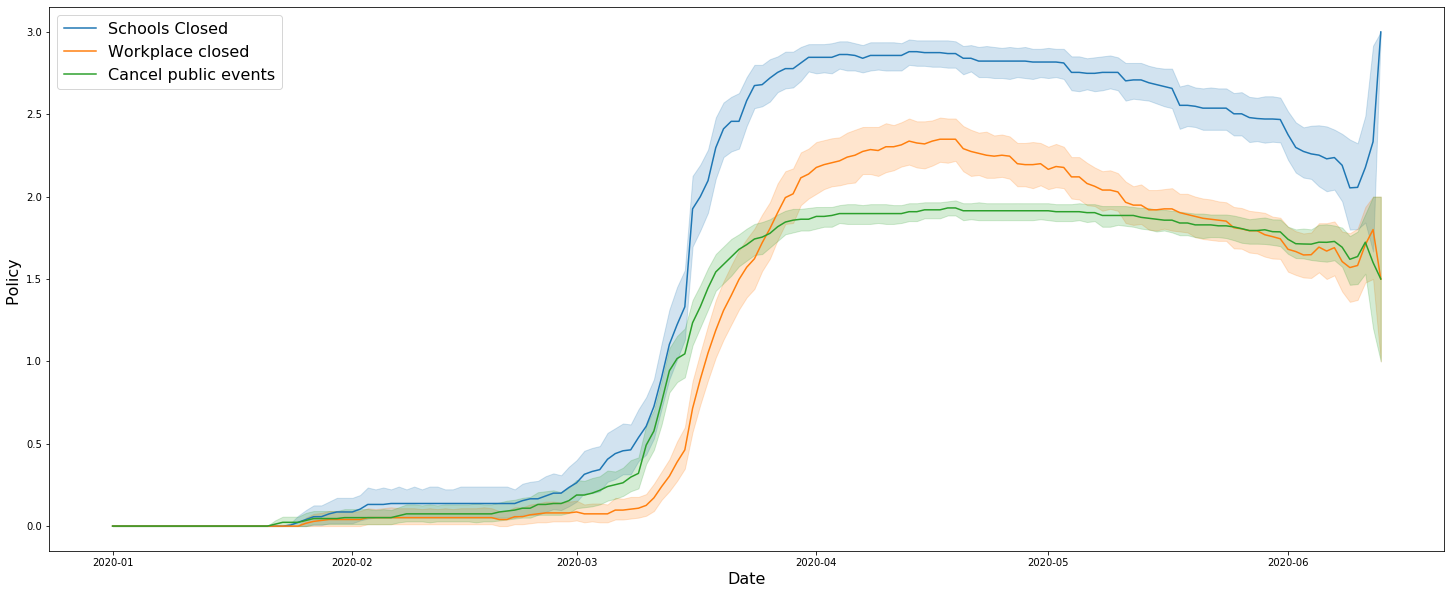

In [111]:
sns.lineplot(data=dta, x="Date", y="C1_School closing");
sns.lineplot(data=dta, x="Date", y="C2_Workplace closing");
sns.lineplot(data=dta, x="Date", y="C3_Cancel public events");
plt.legend(["Schools Closed", "Workplace closed", "Cancel public events"]);
plt.ylabel("Policy ");

In [119]:
X = dta.loc[:, ['CountryName', 'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 
                'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
                'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 
                'E2_Debt/contract relief', #'E3_Fiscal measures', 'E4_International support', 
                'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing',]]

In [120]:
usa = X[X["CountryName"] == "United States"]
usa = usa.groupby("CountryName").mean()

In [122]:
usa_tra = usa.transpose().reset_index()
# usa_tra.rename(columns={"index":"theta", "United States":"r"}, inplace=True)
# usa_tra["r"] = usa_tra["r"]

In [123]:
usa_tra

CountryName                                 index  United States
0                               C1_School closing       1.769231
1                            C2_Workplace closing       1.500000
2                         C3_Cancel public events       1.160256
3                   C4_Restrictions on gatherings       2.070513
4                       C5_Close public transport       0.512821
5                    C6_Stay at home requirements       1.051282
6            C7_Restrictions on internal movement       1.032051
7                C8_International travel controls       2.198718
8                               E1_Income support       0.897436
9                         E2_Debt/contract relief       0.448718
10                H1_Public information campaigns       1.038462
11                              H2_Testing policy       1.756410
12                             H3_Contact tracing       0.871795

In [124]:
fig = px.line_polar(usa_tra, r="United States", theta="index", line_close=True)
fig.update_traces(fill='toself')
fig.show()

# Country Comparison Class

In [199]:
class CountryComparator:
    def __init__(self, country1, country2):
        self.country1 = country1
        self.country2 = country2
        self.df = pd.read_csv("data/OXFORD_latest_imputed.csv", parse_dates=["Date"])
        
        self.ordinal_cols = ['C1_School closing',
                             'C2_Workplace closing','C3_Cancel public events',
                             'C4_Restrictions on gatherings','C5_Close public transport',
                             'C6_Stay at home requirements','C7_Restrictions on internal movement',
                             'C8_International travel controls', 'E1_Income support',
                             'E2_Debt/contract relief', 'H1_Public information campaigns',
                             'H2_Testing policy', 'H3_Contact tracing']
        
        self.continuous_cols = ['E3_Fiscal measures', 'E4_International support',
                                'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']
        
        self.key_metrics = ["CountryName", "Date", "ConfirmedCases", "ConfirmedDeaths"]
    
    def plotCases(self):
        country1_df = self.df.loc[self.df["CountryName"] == self.country1]
        country2_df = self.df.loc[self.df["CountryName"] == self.country2]
        plt.plot('Date', 'ConfirmedCases', data=country1_df)
        plt.plot('Date', 'ConfirmedCases', data=country2_df)
        plt.title("Confirmed cases for {} and {}".format(country1, country2))
        plt.xlabel("Date")
        plt.ylabel("Confirmed Cases")
        plt.legend([country1, country2])
    
    def plotDeaths(self):
        country1_df = self.df.loc[self.df["CountryName"] == self.country1]
        country2_df = self.df.loc[self.df["CountryName"] == self.country2]
        plt.plot('Date', 'ConfirmedDeaths', data=country1_df)
        plt.plot('Date', 'ConfirmedDeaths', data=country2_df)
        plt.title("Confirmed deaths for {} and {}".format(country1, country2))
        plt.xlabel("Date")
        plt.ylabel("Confirmed Deaths")
        plt.legend([country1, country2])
    
    def plotOrdinalRadar(self):
        ordinal_df = self.df[self.key_metrics + self.ordinal_cols]
        ordinal_df = ordinal_df.groupby("CountryName")[self.ordinal_cols].sum()
        self.plotRadar(ordinal_df)
        
    
    def plotRadar(self, df):
        fig = go.Figure()
        
        fig.add_trace(go.Scatterpolar(
            r = list(df.loc[self.country1, :]),
            theta = list(df.columns),
            fill = 'toself',
            name = self.country1
        ))
        
        fig.add_trace(go.Scatterpolar(
            r = list(df.loc[self.country2, :]),
            theta = list(df.columns),
            fill = 'toself',
            name = self.country2
        ))
        
        fig.update_layout(
          polar = dict(
            radialaxis = dict(
              visible = True
            ),
          ),
          showlegend = True,
          title=dict(text = "Policy Comparison")
        )
        
        fig.show()
    
    def vizReport(self):
        ordinal_df = self.df[self.key_metrics + self.ordinal_cols]
        self.subplots(ordinal_df)
        
    def subplots(self, df):
        
        ordinal_country_agg_df = df.groupby(['CountryName'])[self.ordinal_cols].agg('sum')

        # Initialize figure with subplots
        fig = make_subplots(rows=2, cols=1, specs=[[{'type': 'polar'}], [{'type': 'scatter'}]])

        fig.add_trace(go.Scatterpolar(
                r = list(ordinal_country_agg_df.loc[self.country1, :]),
                theta = list(ordinal_country_agg_df.columns),
                fill = 'toself',
                name = self.country1
            ),
            1, 
            1
        )

        fig.add_trace(go.Scatterpolar(
                r = list(ordinal_country_agg_df.loc[self.country2, :]),
                theta = list(ordinal_country_agg_df.columns),
                fill = 'toself',
                name = self.country2,
            ),
            1, 
            1,
        )
        
        ordinal_country_date_agg_df = df.groupby(['CountryName', 'Date'])[self.key_metrics].agg('sum')
        dates = list(ordinal_country_date_agg_df.index.get_level_values(1))

        fig.add_trace(go.Scatter(
                x=dates,
                y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[self.country1, :], :]['ConfirmedCases']),
                name=self.country1 + " - Confirmed Cases",
            ),
            2, 
            1
        )

        fig.add_trace(go.Scatter(
                x=dates,
                y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[self.country2, :], :]['ConfirmedCases']),
                name=self.country2 + " - Confirmed Cases"
            ),
            2, 
            1
        )

        fig.add_trace(go.Scatter(
                x=dates,
                y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[self.country1, :], :]['ConfirmedDeaths']),
                name=self.country1 + " - Confirmed Deaths"
            ),
            2, 
            1
        )

        fig.add_trace(go.Scatter(
                x=dates,
                y=list(ordinal_country_date_agg_df.loc[pd.IndexSlice[self.country2, :], :]['ConfirmedDeaths']),
                name=self.country2 + "- Confirmed Deaths"
            ),
            2, 
            1
        )

        fig.update_layout(height=800, width=1000, title_text="Comparison of Policies and Cases")

        fig.show()

In [202]:
country1 = "United States"
country2 = "New Zealand"
cc = CountryComparator(country1, country2)

In [203]:
cc.vizReport()